# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:

from google.colab import drive

drive.mount('/content/drive')


import pandas as pd

# Correct file paths after mounting
spam_df = pd.read_csv('/content/drive/MyDrive/emails.csv', on_bad_lines='skip', nrows=50)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
45,Subject: 1000 full color brochures 335 the ts...,1
46,Subject: search for the best and cheapest phar...,1
47,Subject: failure notice hi . this is the qmai...,1
48,Subject: claim your free home depot gift card ...,1
49,"Subject: breaking biotech news hey , i though...",1


In [5]:
spam_df.describe()

,spam
count,50.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
 1   spam    50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


# STEP #2: VISUALIZE DATASET

In [7]:
# Popular ham/spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
1       50     50  Subject: naturally irresistible your corporate...    1

In [8]:
# Length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [9]:
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
5,"Subject: great nnews hello , welcome to medzo...",1,478
6,Subject: here ' s a hot play in motion homela...,1,9340
7,Subject: save your money buy getting this thin...,1,446
8,Subject: undeliverable : home based business f...,1,507
9,Subject: save your money buy getting this thin...,1,446


<Axes: ylabel='Frequency'>

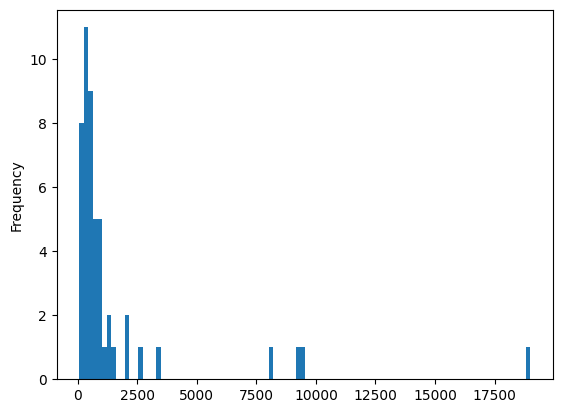

In [10]:
spam_df['length'].plot(bins=100, kind='hist')

In [11]:
spam_df.length.describe()

,length
count,50.000000
mean,1597.300000
std,3256.999059
min,80.000000
25%,359.750000
50%,540.500000
75%,998.250000
max,18999.000000


In [12]:

spam_df['length'].max()

18999

In [14]:
ham = spam_df[spam_df['spam']==0]

In [15]:
spam = spam_df[spam_df['spam']==1]

In [16]:
ham

,text,spam,length


In [17]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
5,"Subject: great nnews hello , welcome to medzo...",1,478
6,Subject: here ' s a hot play in motion homela...,1,9340
7,Subject: save your money buy getting this thin...,1,446
8,Subject: undeliverable : home based business f...,1,507
9,Subject: save your money buy getting this thin...,1,446


<Axes: ylabel='Frequency'>

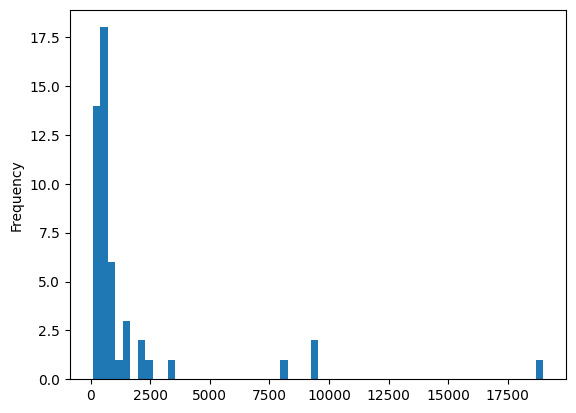

In [18]:
spam['length'].plot(bins=60, kind='hist')

<Axes: ylabel='Frequency'>

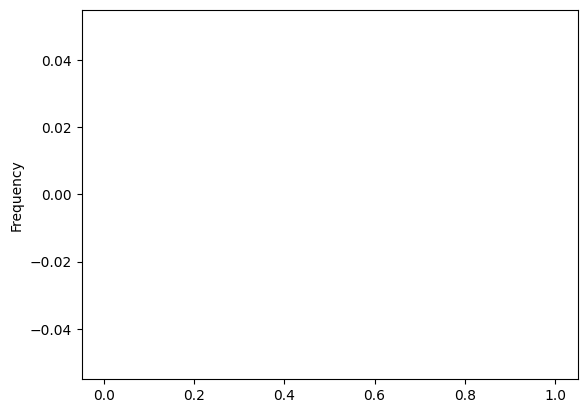

In [19]:
ham['length'].plot(bins=60, kind='hist')

In [20]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 100.0 %


In [21]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 0.0 %


<Axes: ylabel='count'>

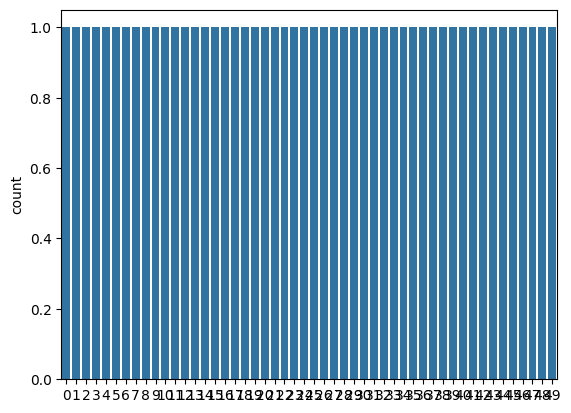

In [22]:
sns.countplot(spam_df['spam'], label = "Count")

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 EXERCISE: REMOVE PUNCTUATION

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [25]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [26]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

# STEP 3.2 EXERCISE: REMOVE STOPWORDS

In [28]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [30]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [31]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

# STEP 3.3 EXERCISE: COUNT VECTORIZER EXAMPLE

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

# Get feature names in newer versions
print(vectorizer.get_feature_names_out())



['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [36]:
print(vectorizer.get_feature_names_out())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [37]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# LET'S APPLY THE PREVIOUS THREE PROCESSES TO OUR SPAM/HAM EXAMPLE

In [38]:
# Pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [39]:
# Test the newly added function
spam_df_clean = spam_df['text'].apply(message_cleaning)

In [40]:
print(spam_df_clean[0])

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [41]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

# LET'S APPLY COUNT VECTORIZER TO OUR MESSAGES LIST

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [44]:
print(vectorizer.get_feature_names_out())

['0' '00' '000' ... 'youlosing' 'young' 'zxghlajf']


In [45]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 1 0]]


In [46]:
spamham_countvectorizer.shape

(50, 2782)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [47]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [48]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [49]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 1])

In [50]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [51]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 1])

# STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [52]:
X = spamham_countvectorizer
y = label

In [53]:
X.shape

(50, 2782)

In [54]:
y.shape

(50,)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# STEP#5: EVALUATING THE MODEL

In [57]:
from sklearn.metrics import classification_report, confusion_matrix


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

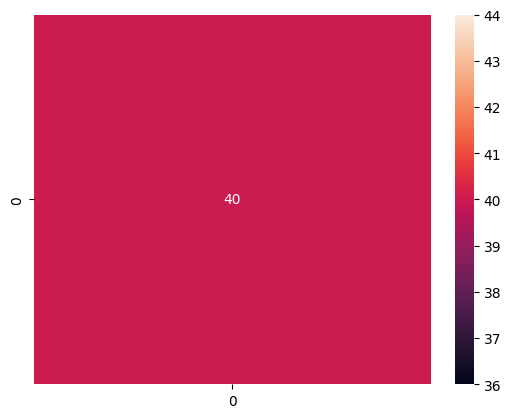

In [58]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

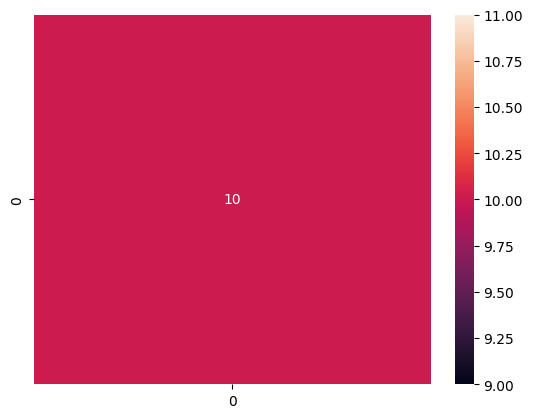

In [59]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# STEP #6: LET'S ADD ADDITIONAL FEATURE TF-IDF

In [61]:
spamham_countvectorizer

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5169 stored elements and shape (50, 2782)>

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(50, 2782)


In [63]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5169 stored elements and shape (50, 2782)>
  Coords	Values
  (0, 15)	0.07215166893411908
  (0, 155)	0.022977754345718186
  (0, 216)	0.09739531222432214
  (0, 231)	0.09739531222432214
  (0, 265)	0.08146834658398854
  (0, 333)	0.09739531222432214
  (0, 368)	0.15268201775611892
  (0, 383)	0.09739531222432214
  (0, 422)	0.09739531222432214
  (0, 440)	0.08807863457445267
  (0, 445)	0.10219473117571282
  (0, 478)	0.09739531222432214
  (0, 503)	0.08807863457445267
  (0, 505)	0.08807863457445267
  (0, 526)	0.09739531222432214
  (0, 536)	0.09739531222432214
  (0, 554)	0.08807863457445267
  (0, 584)	0.1885049738527488
  (0, 629)	0.16293669316797707
  (0, 638)	0.09739531222432214
  (0, 650)	0.08807863457445267
  (0, 676)	0.09739531222432214
  (0, 709)	0.07634100887805946
  (0, 791)	0.09739531222432214
  (0, 806)	0.08807863457445267
  :	:
  (49, 2699)	0.06537222172034313
  (49, 2704)	0.01466390112985373
  (49, 2708)	0.01466390112985373


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

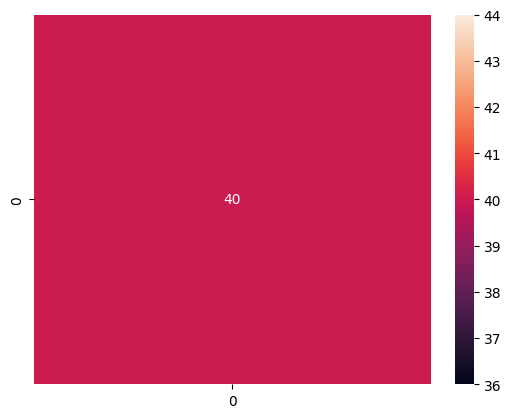

In [64]:
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))